In [15]:
# # pyright: reportMissingImports=false
# import os
# import numpy as np
# import torch
# import torch.nn.functional as F
# from torchvision.transforms import (
#     Compose,    
#     Normalize,
#     Resize,
#     RandomHorizontalFlip,
#     ToTensor,
#     ToPILImage,
# )
# from torchvision.datasets import ImageFolder
# from src.augment.geoaug import GeoAugment

# def pyramid_transform(img_size, mask_size,  mean=0, std=1):
#     transform = {
#         'preprocess': Compose([
#             Resize([mask_size, mask_size]),
#             ToTensor(),            
#         ]),
#         'head': Compose([
#             ToPILImage(),
#             RandomHorizontalFlip(),            
#         ]),
#         'image': Compose([
#             Resize([img_size, img_size]),
#             ToTensor(),
#             Normalize(mean=(mean), std=(std)),
#         ]),        
#     }
#     def final_transform(img, mask):
#         img = transform['preprocess'](img)
#         img = img * mask        
#         flipped = transform['head'](img)
#         return {
#             'image': transform['image'](flipped),            
#         }
#     return final_transform

# class FastDataset(torch.utils.data.Dataset):
    
#     def __init__(self, config):
        
#         self.num_workers = config.num_workers
#         self.pin_memory = config.pin_memory        
#         self.outline_size =  config.fast_outline_size
#         self.geoaug_policy = config.geoaug_policy

#         self.image_root = config.fast_image_root
#         self.mask_root = config.mask_root            
#         self.image_size = config.fast_image_size
#         self.mask_size = config.mask_size
#         self.image_mean = config.fast_image_mean
#         self.image_std = config.fast_image_std
        
#         blueprint = np.load(os.path.join(config.data_dir, config.blueprint))
#         points = torch.tensor(blueprint['points'])                
                       
#         self.points = self.scale(points, self.outline_size)                
        
#         self.transform = pyramid_transform(self.image_size, self.mask_size, 
#                                            self.image_mean, self.image_std)
#         self.img_ds = ImageFolder(self.image_root)
        
#     def scale(self, t, size):
#         return F.interpolate(t, size=size, mode='bicubic', align_corners=True)
        
#     def __len__(self):
#         return len(self.img_ds)
    
#     def __getitem__(self, idx):              
#         points = self.points[idx % self.points.size(0)]
#         idx_img = idx % len(self.img_ds)
#         image, _ = self.img_ds[idx_img]
#         mask_path =  self.img_ds.imgs[0][0].replace(self.image_root, self.mask_root)
#         mask = torch.load(mask_path.replace('.png', '.pth'))
#         res = self.transform(image, mask)        
#         res['outline'] = GeoAugment(points, policy=self.geoaug_policy)         
#         return res

from src.data.fast_dataset import FastDataset
    
from src.config import get_parser

config = get_parser().parse_args(args=[])  

ds = FastDataset(config)
ds

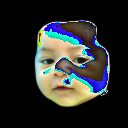

In [16]:
ToPILImage()(ds[0]['image'])

In [14]:
ds.img_ds.imgs[0]

('/home/bobi/Desktop/db/ffhq-dataset/images1024x1024/00000/00000.png', 0)

In [23]:
ds.img_ds[0]#[0]['image']

(<PIL.Image.Image image mode=RGB size=1024x1024 at 0x7F03F3100EB0>, 0)

TypeError: ToTensor() takes no arguments